In [1]:
# Importing relevant modules
import numpy
import pandas as pd
import matplotlib
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
import sklearn
import sklearn.model_selection
import sklearn.neural_network
import sklearn.ensemble
import sklearn.svm
import sklearn.preprocessing
import sklearn.metrics
import scipy.stats


# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset:
data_url = 'https://raw.githubusercontent.com/Moataz-AbdElKhalek/Concrete_Compressive_Strength_Prediction/main/dataset/Concrete_Dataset_Classification.csv'
dataset = pd.read_csv(data_url)

print(dataset.head(4))

# Descriptive statistics
print("\nDataset has {} rows and {} columns".format(dataset.shape[0],dataset.shape[1]))

print()
y = dataset['y']
print(y.head(4))
print(y.shape)
print()

X = dataset.drop(['y'], axis=1)
print(X.head(4))
print(X.shape)

      X1     X2   X3     X4   X5      X6     X7     X8    y
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28.0  1.0
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28.0  1.0
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270.0  1.0
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365.0  1.0

Dataset has 1030 rows and 9 columns

0    1.0
1    1.0
2    1.0
3    1.0
Name: y, dtype: float64
(1030,)

      X1     X2   X3     X4   X5      X6     X7     X8
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28.0
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28.0
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270.0
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365.0
(1030, 8)


In [3]:
# Applying statistical Analysis on the data:
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,y
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,-0.048544
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,0.999306
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,-1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,-1.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,-1.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,1.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,1.000000


# **Data Preprocessing**

In [4]:
# Using Scikit-learn MaxMinScaler: 
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))

# extract attributes and scale data to have Min = -1 and Max = 1 :
cols = X.columns
print('Data Attributes:\n', cols)
print('\nBefore Data Scaling:\n', X.head(4))
sc_X = scaler.fit_transform(X) # Fit scaler to data, then transform data to specified feature_range(-1,1)

# Turn the scaling results back into a dataframe :
sc_X_df = pd.DataFrame(sc_X, columns = cols)
X = sc_X_df
print('\nAfter Data Scaling:\n', X.head(4))

# Applying statistical Analysis on the data:
X.describe()

Data Attributes:
 Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')

Before Data Scaling:
       X1     X2   X3     X4   X5      X6     X7     X8
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28.0
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28.0
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270.0
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365.0

After Data Scaling:
          X1        X2   X3        X4       X5        X6       X7        X8
0  1.000000 -1.000000 -1.0 -0.357827 -0.84472  0.389535 -0.58856 -0.851648
1  1.000000 -1.000000 -1.0 -0.357827 -0.84472  0.476744 -0.58856 -0.851648
2  0.052511 -0.207012 -1.0  0.696486 -1.00000 -0.238372 -1.00000  0.478022
3  0.052511 -0.207012 -1.0  0.696486 -1.00000 -0.238372 -1.00000  1.000000


,X1,X2,X3,X4,X5,X6,X7,X8
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,-0.181882,-0.588782,-0.458387,-0.045251,-0.614617,-0.000471,-0.098944,-0.754604
std,0.477198,0.480130,0.639650,0.341122,0.371046,0.452058,0.402288,0.347087
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.587329,-1.000000,-1.000000,-0.311502,-1.000000,-0.238372,-0.312845,-0.967033
50%,-0.219635,-0.877574,-1.000000,0.009585,-0.602484,-0.029070,-0.069242,-0.851648
75%,0.132420,-0.204508,0.182409,0.121406,-0.366460,0.327907,0.154039,-0.697802
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **SVM Model Optimization**
# Using 10-fold Cross-Validation

In [5]:
def SVM_CV(kernels,C_range,gamma_range):
    
  # Preparing the Model:
  model = sklearn.svm.SVC(random_state=1)

  # Determining Model Hyperparameters to be tested and optimized:
  paras = {'kernel':kernels, 'C':C_range, 'gamma':gamma_range}

  # Preparing Cross-Validation to be used to fit the Model and the Hyperparameters:
  # Using 10-fold Cross-Validation:
  gridCV = sklearn.model_selection.GridSearchCV(model, paras, cv=10, scoring='accuracy', verbose=10, n_jobs=-1)
  gridCV.fit(X, y)

  best_C = gridCV.best_params_['C']
  best_gamma = gridCV.best_params_['gamma']
  best_kernel = gridCV.best_params_['kernel']
  best_score = gridCV.best_score_
  results = gridCV.cv_results_

  return best_C, best_gamma, best_kernel, best_score, results

In [6]:
best_C, best_gamma, best_kernel, best_score, results = SVM_CV(['rbf'],numpy.logspace(-5, 5, 11),numpy.logspace(-5, 5, 11))

Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1927s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0962s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:    5.1s
[Parallel(n_jo

In [7]:
print('best_C =',best_C)
print('best_gamma =',best_gamma)
print('best_kernel =', best_kernel)
print('Cross-Validation Mean Best Score for the Model =',best_score)
print('\nCross-Validation Mean Test Scores\n', results['mean_test_score'])

for i in range(10):
  print('\nSplit_'+str(i+1)+' Scores\n',results['split'+str(i)+'_test_score'])
  print('best_score (Split_'+str(i+1)+') =', max(results['split'+str(i)+'_test_score']))

best_C = 100.0
best_gamma = 1.0
best_kernel = rbf
Cross-Validation Mean Best Score for the Model = 0.8223300970873785

Cross-Validation Mean Test Scores
 [0.52427184 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184
 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184
 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184
 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184
 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184
 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184
 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184
 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184 0.52427184
 0.73398058 0.73106796 0.57087379 0.52427184 0.52427184 0.52427184
 0.52427184 0.52427184 0.52427184 0.52427184 0.74466019 0.79320388
 0.74854369 0.68932039 0.68252427 0.57087379 0.56893204 0.53203883
 0.52427184 0.52427184 0.74660194 0.79902913 0.78932039 0.77281553
 0.72135922 0.68543689 0.57087379 0.569902

# **Data Fixed Single Splitting**
(70% Training and 30% Testing)

In [8]:
# Dividing samples dataset into training and test datasets:
def dataset_divide(X, y):
  X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.70, random_state=1)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = dataset_divide(X,y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(721, 8)
(721,)
(309, 8)
(309,)


# **SVM Final Optimized Model**

In [9]:
# SVM Classification Model:
def SVM_Classification(X,y, best_kernel='rbf', C_optimum = 100, gamma_optimum = 1):
  model = sklearn.svm.SVC(kernel= best_kernel, C = C_optimum, gamma = gamma_optimum, random_state=1)
  model.fit(X, y)

  return model

Score of Model Evaluation with Testing Data = 0.8446601941747572
rmse_test =  0.7882634225314344
pcc_test =  0.689361885866495
scc_test =  0.6893618858664952


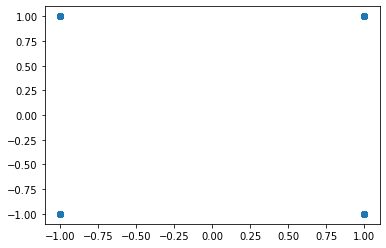

Score of Model Evaluation with Training Data = 0.9805825242718447
rmse_train =  0.2786932057166471
pcc_train =  0.9610457626727164
scc_train =  0.9610457626727165


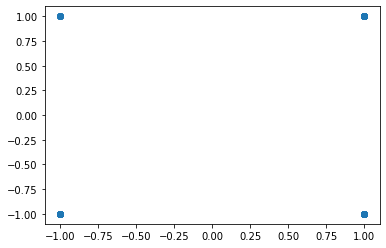

In [10]:
# SVM Classification Model Training:
SVM_Model = SVM_Classification(X_train, y_train)

# SVM Classification Model Evaluation on Testing Data:
current_score = SVM_Model.score(X_test,y_test)
y_test_hat = SVM_Model.predict(X_test) # testing output

print('Score of Model Evaluation with Testing Data =', current_score)
# RMSE
rmse_test = sklearn.metrics.mean_squared_error(y_test, y_test_hat, squared=False)
print('rmse_test = ',rmse_test)

# Pearson's correlation
pcc_test = scipy.stats.pearsonr(y_test, y_test_hat)[0]
print ('pcc_test = ', pcc_test)

#Spearman's correlation
scc_test = scipy.stats.spearmanr(y_test, y_test_hat)[0]
print ('scc_test = ', scc_test)

matplotlib.pyplot.scatter(y_test,y_test_hat)
matplotlib.pyplot.show()

# SVM Classification Model Evaluation on Training Data:
current_score = SVM_Model.score(X_train,y_train)
y_train_hat = SVM_Model.predict(X_train) # testing output

print('Score of Model Evaluation with Training Data =', current_score)
# RMSE
rmse_train = sklearn.metrics.mean_squared_error(y_train, y_train_hat, squared=False)
print('rmse_train = ',rmse_train)
# Pearson's correlation
pcc_train = scipy.stats.pearsonr(y_train, y_train_hat)[0]
print ('pcc_train = ', pcc_train)

#Spearman's correlation
scc_train = scipy.stats.spearmanr(y_train, y_train_hat)[0]
print ('scc_train = ', scc_train)

matplotlib.pyplot.scatter(y_train,y_train_hat)
matplotlib.pyplot.show()